# TextRank

In [163]:
def analyze_raw(res_list):
    rouge1 = 0
    rouge2 = 0
    rougel = 0
    for l in res_list:
        rouge1 += float(l.split()[0])
        rouge2 += float(l.split()[1])
        rougel += float(l.split()[2])
    rouge1 /= len(res_list)
    rouge2 /= len(res_list)
    rougel /= len(res_list)
    return (rouge1, rouge2, rougel)

def analyze_nan_stripped(res_list):
    valid = 0
    rouge1 = 0
    rouge2 = 0
    rougel = 0
    for l in res_list:
        if '0' not in l.split():
            rouge1 += float(l.split()[0])
            rouge2 += float(l.split()[1])
            rougel += float(l.split()[2])
            valid += 1
    if valid != 0:
        rouge1 /= valid
        rouge2 /= valid
        rougel /= valid
    else:
        rouge1 = 1e-5
        rouge2 = 1e-5
        rougel = 1e-5
        
    return (rouge1, rouge2, rougel)

In [15]:
rankres = list()
with open('rankres.txt', 'r') as f:
    rankres = f.readlines()

cnt = 0
for l in rankres:
    if '0' in l.split():
        cnt += 1
print(cnt / len(rankres))


rouge1 = 0
rouge2 = 0
rougel = 0
for l in rankres:
    if '0' in l.split():
        continue
    rouge1 += float(l.split()[0])
    rouge2 += float(l.split()[1])
    rougel += float(l.split()[2])
rouge1 /= (len(rankres) - cnt)
rouge2 /= (len(rankres) - cnt)
rougel /= (len(rankres) - cnt)

print(rouge1)
print(rouge2)
print(rougel)

0.39915021244688825
0.24631334364202095
0.11373737311696273
0.21892589067786652


# TF-IDF

In [147]:
log_res = [list() for i in range(8)]

for i in range(1, 8):
    with open('./tfidf_res/log_res0.{}'.format(i), 'r') as f:
        log_res[i] = f.readlines()
# print(analyze_raw(log_res[1]))
# print(analyze_nan_stripped(log_res[1]))
for i in range(1, 8):
    print('| ' + '0.{}'.format(8 - i), end=' | ')
    for score in analyze_nan_stripped(log_res[i]):
        print("%.3f" % (score), end=' | ')
    print('\n')
    print(analyze_raw(log_res[i]), end='\t')
    print(analyze_nan_stripped(log_res[i]))

| 0.7 | 0.393 | 0.245 | 0.393 | 

(0.002427456738878906, 1.5323550064864736e-05, 0.002424252411755559)	(0.3925925925925926, 0.24523809523809526, 0.3925925925925926)
| 0.6 | 0.296 | 0.164 | 0.296 | 

(0.004373732039469458, 2.7377576740236073e-05, 0.004353059447877097)	(0.29642318465847883, 0.1643065268065268, 0.29642318465847883)
| 0.5 | 0.257 | 0.136 | 0.257 | 

(0.004679150612112026, 3.3959216430432994e-05, 0.0046394249155662075)	(0.25667395613216054, 0.1358708249381624, 0.25667395613216054)
| 0.4 | 0.210 | 0.116 | 0.210 | 

(0.004382822762011809, 3.3950518701285515e-05, 0.004343105379095869)	(0.2100354692879163, 0.11643087884900859, 0.2100354692879163)
| 0.3 | 0.184 | 0.097 | 0.184 | 

(0.004010115592652738, 3.451658912436167e-05, 0.003964242795574001)	(0.18424926593724547, 0.09748296923757956, 0.18424926593724547)
| 0.2 | 0.164 | 0.084 | 0.164 | 

(0.003650341237885415, 3.502647347605023e-05, 0.003603023754323347)	(0.16409781723849, 0.08408455222660619, 0.16409781723849)
| 0.1 | 0.1

In [148]:
naive_res = [list() for i in range(8)]

for i in range(1, 8):
    with open('./tfidf_res/naive_res0.{}'.format(i), 'r') as f:
        naive_res[i] = f.readlines()
# print(analyze_raw(log_res[1]))
# print(analyze_nan_stripped(log_res[1]))

for i in range(1, 8):
    print(analyze_raw(naive_res[i]), end='\t')
    print(analyze_nan_stripped(naive_res[i]))

for i in range(1, 8):
    print('| ' + '0.{}'.format(8 - i), end=' | ')
    for score in analyze_nan_stripped(naive_res[i]):
        print("%.3f" % (score), end=' | ')
    print('\n')

(0.0010964605159806352, 0.0, 0.0010922948907202837)	(1e-05, 1e-05, 1e-05)
(0.0020600216627593452, 7.258286438491388e-06, 0.0020600216627593452)	(0.2967032967032967, 0.17424242424242425, 0.2967032967032967)
(0.0027292636340534074, 1.1178344536181549e-05, 0.002717045965723452)	(0.23645510835913314, 0.13417366946778714, 0.23645510835913314)
(0.0030568830475763077, 1.537920534854738e-05, 0.0030411996866966367)	(0.19066959701153882, 0.10548377245635097, 0.19066959701153882)
(0.003150257339696786, 2.359970313415389e-05, 0.003128912754293938)	(0.17234104850428264, 0.09442241223974972, 0.17234104850428264)
(0.003093107384035073, 3.3494091687447614e-05, 0.0030669735680653788)	(0.16540234397979672, 0.0846378068472492, 0.16540234397979672)
(0.20639667599644404, 0.062021497332455315, 0.18721187300705538)	(0.2806046763878998, 0.1234466370803737, 0.2576788515378733)
| 0.7 | 0.000 | 0.000 | 0.000 | 

| 0.6 | 0.297 | 0.174 | 0.297 | 

| 0.5 | 0.236 | 0.134 | 0.236 | 

| 0.4 | 0.191 | 0.105 | 0.191 | 


# Improved-TF-IDF

In [149]:
imp_log_res = [list() for i in range(8)]

for i in range(1, 8):
    with open('./tfidf_impro_res/log_res0.{}'.format(i), 'r') as f:
        imp_log_res[i] = f.readlines()
# print(analyze_raw(log_res[1]))
# print(analyze_nan_stripped(log_res[1]))
for i in range(1, 8):
    print(analyze_raw(imp_log_res[i]), end='\t')
    print(analyze_nan_stripped(imp_log_res[i]))

for i in range(1, 8):
    print('| ' + '0.{}'.format(8 - i), end=' | ')
    for score in analyze_nan_stripped(imp_log_res[i]):
        print("%.3f" % (score), end=' | ')
    print('\n')

(0.005020599823094057, 0.0001098635689987852, 0.00499585506578244)	(0.3700999483608178, 0.2293378119465076, 0.3700999483608178)
(0.005345897028752258, 7.671665988704375e-05, 0.005303321208245921)	(0.2946178856325211, 0.1674236488407611, 0.2946178856325211)
(0.005085268165979294, 6.26054573529392e-05, 0.005025802405358855)	(0.24677043802430806, 0.13662787356496897, 0.24677043802430806)
(0.0045984176626924665, 5.515731921427745e-05, 0.004532722879743717)	(0.22124759444513992, 0.11513970478764735, 0.2166709354062383)
(0.004134272642511284, 4.979411150762826e-05, 0.004072413379528001)	(0.19345734298454922, 0.09961312007101035, 0.18966946419667044)
(0.0037566900947615138, 4.8767313821287745e-05, 0.0036944203629507002)	(0.16926705124520194, 0.08671912115509878, 0.16630408828223897)
(0.003433771656248991, 4.450274950669018e-05, 0.0033753884282439438)	(0.15231070576400077, 0.07630950033268603, 0.14759518319133533)
| 0.7 | 0.370 | 0.229 | 0.370 | 

| 0.6 | 0.295 | 0.167 | 0.295 | 

| 0.5 | 0.24

In [151]:
imp_naive_res = [list() for i in range(8)]

for i in range(1, 8):
    with open('./tfidf_impro_res/naive_res0.{}'.format(i), 'r') as f:
        imp_naive_res[i] = f.readlines()
# print(analyze_raw(log_res[1]))
# print(analyze_nan_stripped(log_res[1]))
for i in range(1, 8):
    print(analyze_raw(imp_naive_res[i]), end='\t')
    print(analyze_nan_stripped(imp_naive_res[i]))
for i in range(1, 8):
    print('| ' + '0.{}'.format(8 - i), end=' | ')
    for score in analyze_nan_stripped(imp_naive_res[i]):
        print("%.3f" % (score), end=' | ')
    print('\n')

(0.0022197490642879452, 4.628472511501754e-06, 0.0022151205917764435)	(0.3636363636363636, 0.2222222222222222, 0.3636363636363636)
(0.0032897754381131816, 1.7769450411289953e-05, 0.0032777191573115875)	(0.29128205128205126, 0.1706293706293706, 0.29128205128205126)
(0.0037414488667736837, 3.840398704917869e-05, 0.003718715896806354)	(0.2581330050965679, 0.14183478663116672, 0.2581330050965679)
(0.0037282419397614407, 5.049127924722124e-05, 0.0036934632648559828)	(0.20825642760480437, 0.11019033178261756, 0.2034717386095891)
(0.0035530007835133898, 5.16823377645279e-05, 0.003509931585847993)	(0.18538332982147512, 0.0954374000288659, 0.1818868263249716)
(0.0033817578022922426, 4.5297636420455456e-05, 0.0033299015446642175)	(0.16428675183660285, 0.08364731230072721, 0.16120982875967976)
(0.207727637542522, 0.06275775752956234, 0.18852668983797097)	(0.28173085616422544, 0.12392699872185618, 0.2588097550699172)
| 0.7 | 0.364 | 0.222 | 0.364 | 

| 0.6 | 0.291 | 0.171 | 0.291 | 

| 0.5 | 0.258

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.77619893,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  5.3285968 ,  0.        ,  0.        ,
         0.        , 10.65719361,  0.        ,  0. 

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

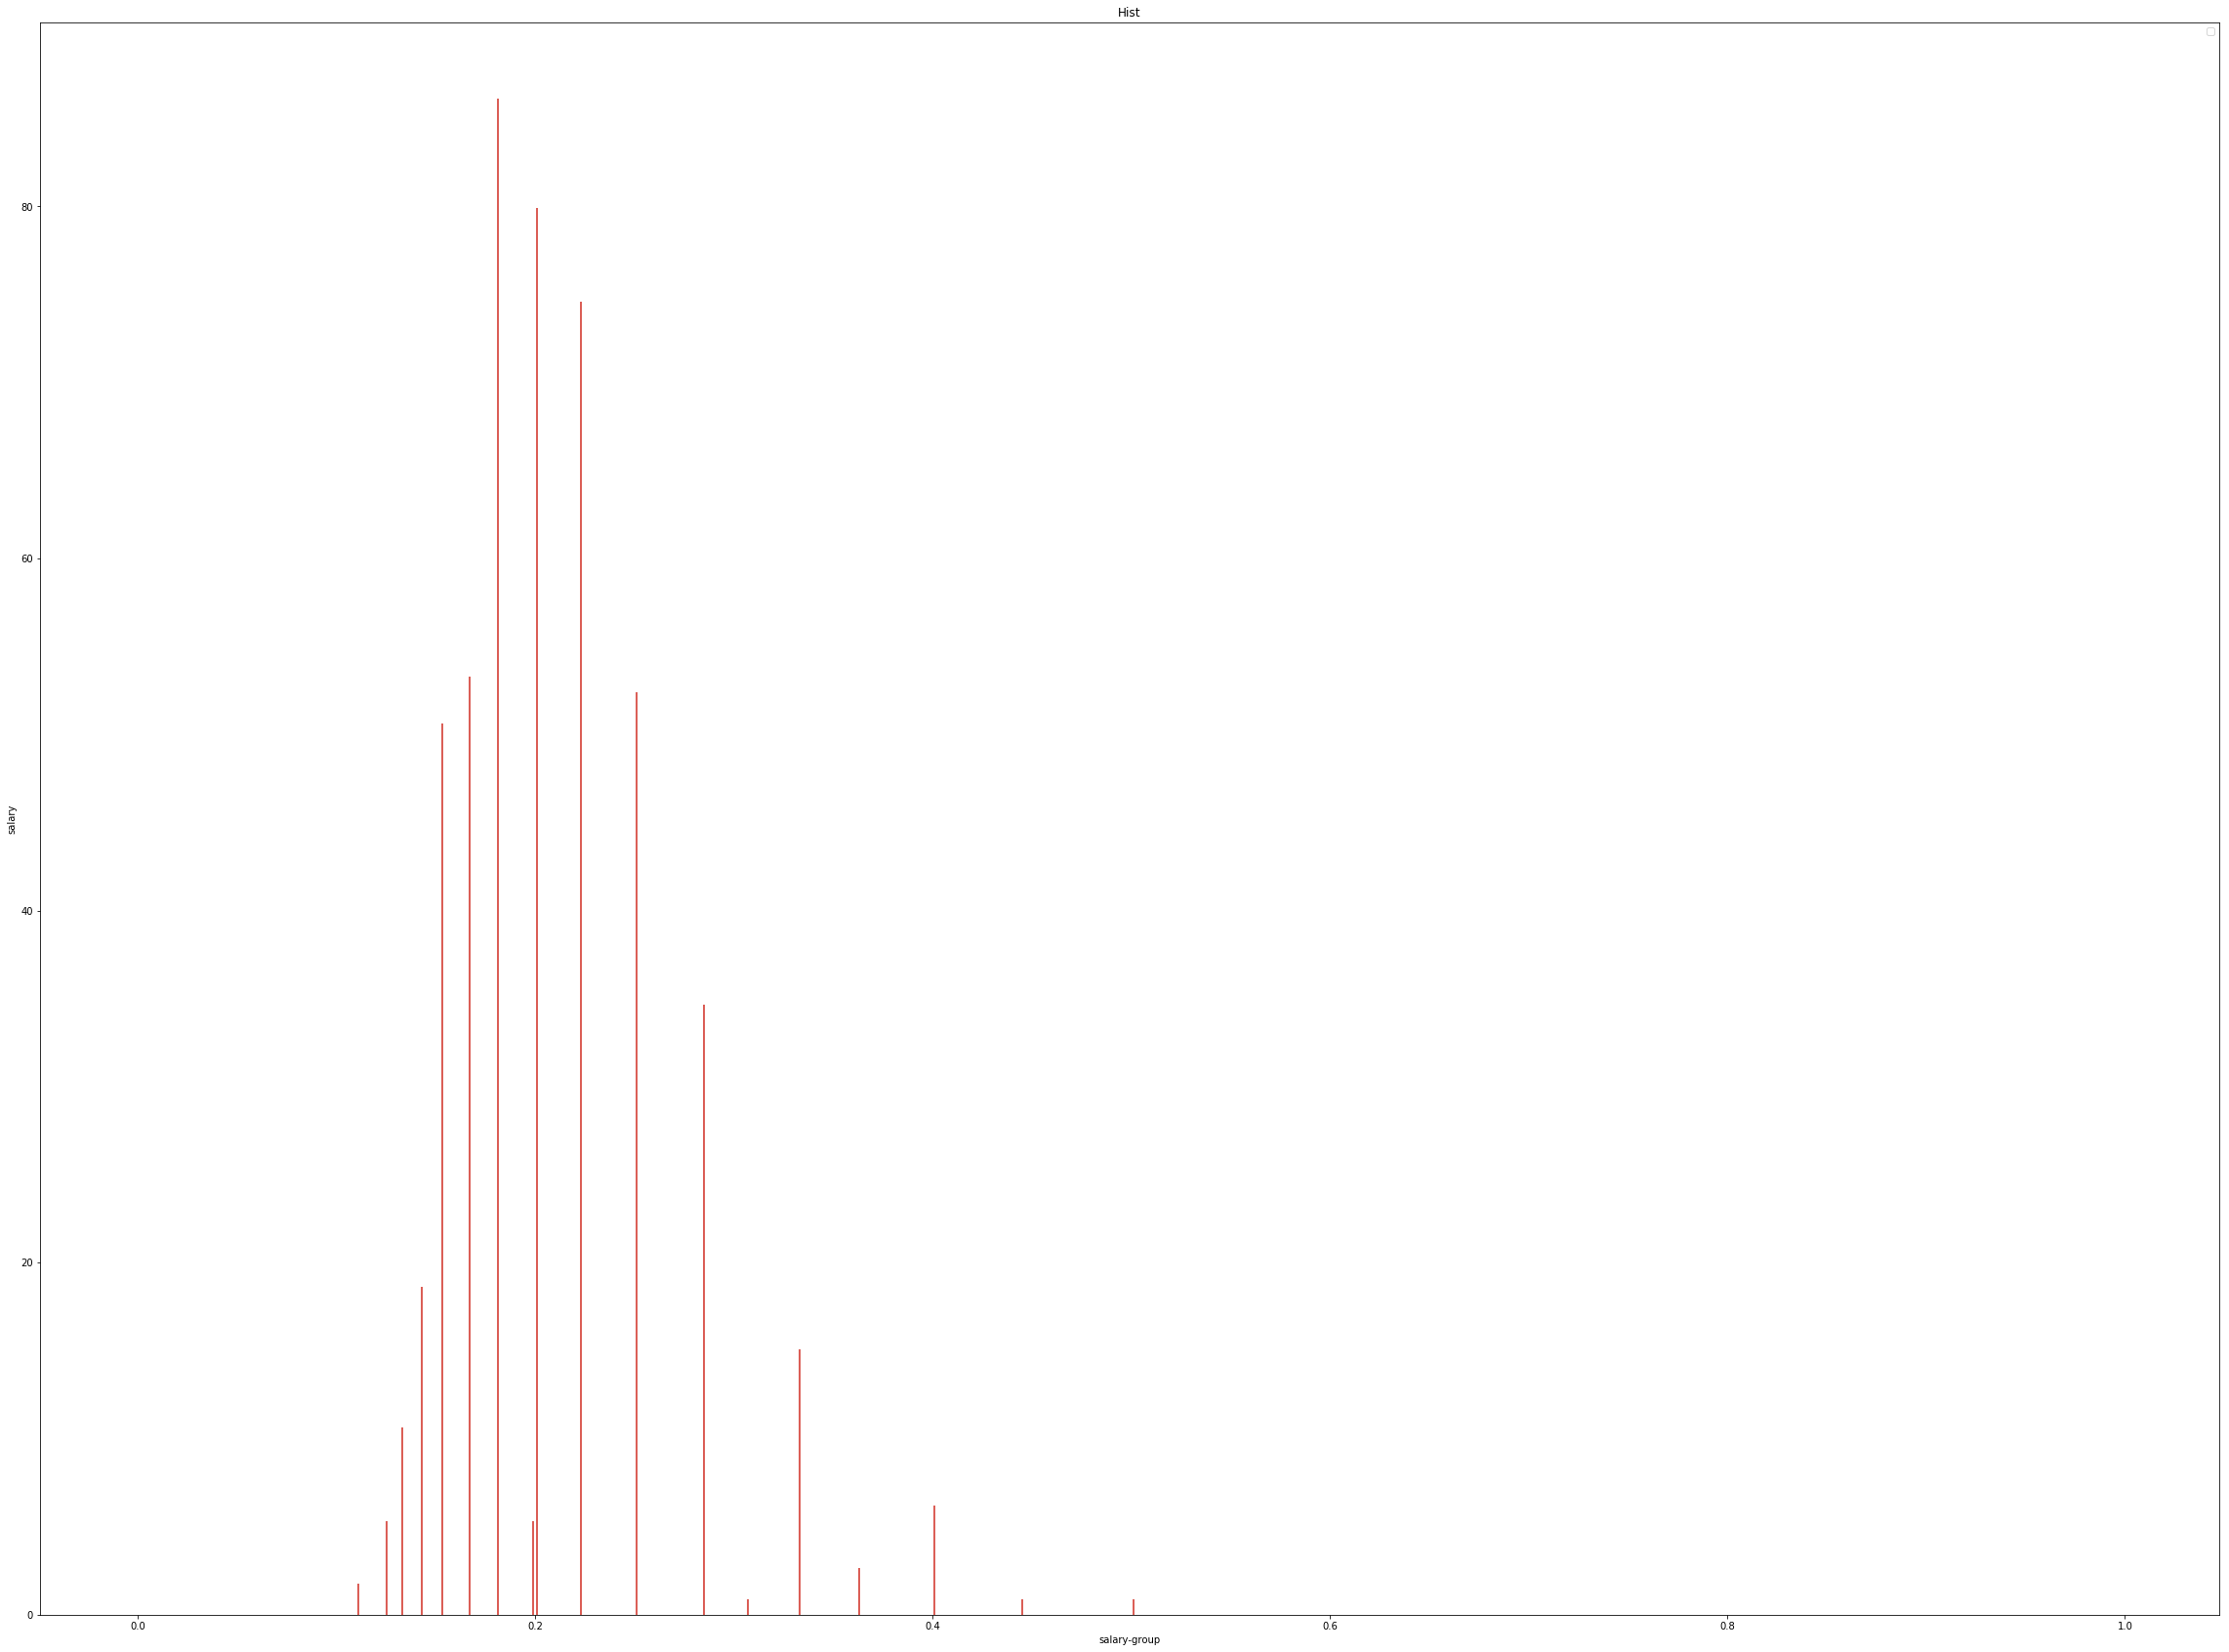

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.7800312 ,  0.        ,  0.3900156 ,
         1.1700468 ,  0.        ,  6.63026521,  0.        ,  0.        ,
        15.60062402,  0.        ,  0.        , 27.30109204,  0.        ,
         0.        ,  0.        , 40.56162246,  0.        ,  0.        ,
         0.        , 61.2324493 ,  0.        ,  0. 

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

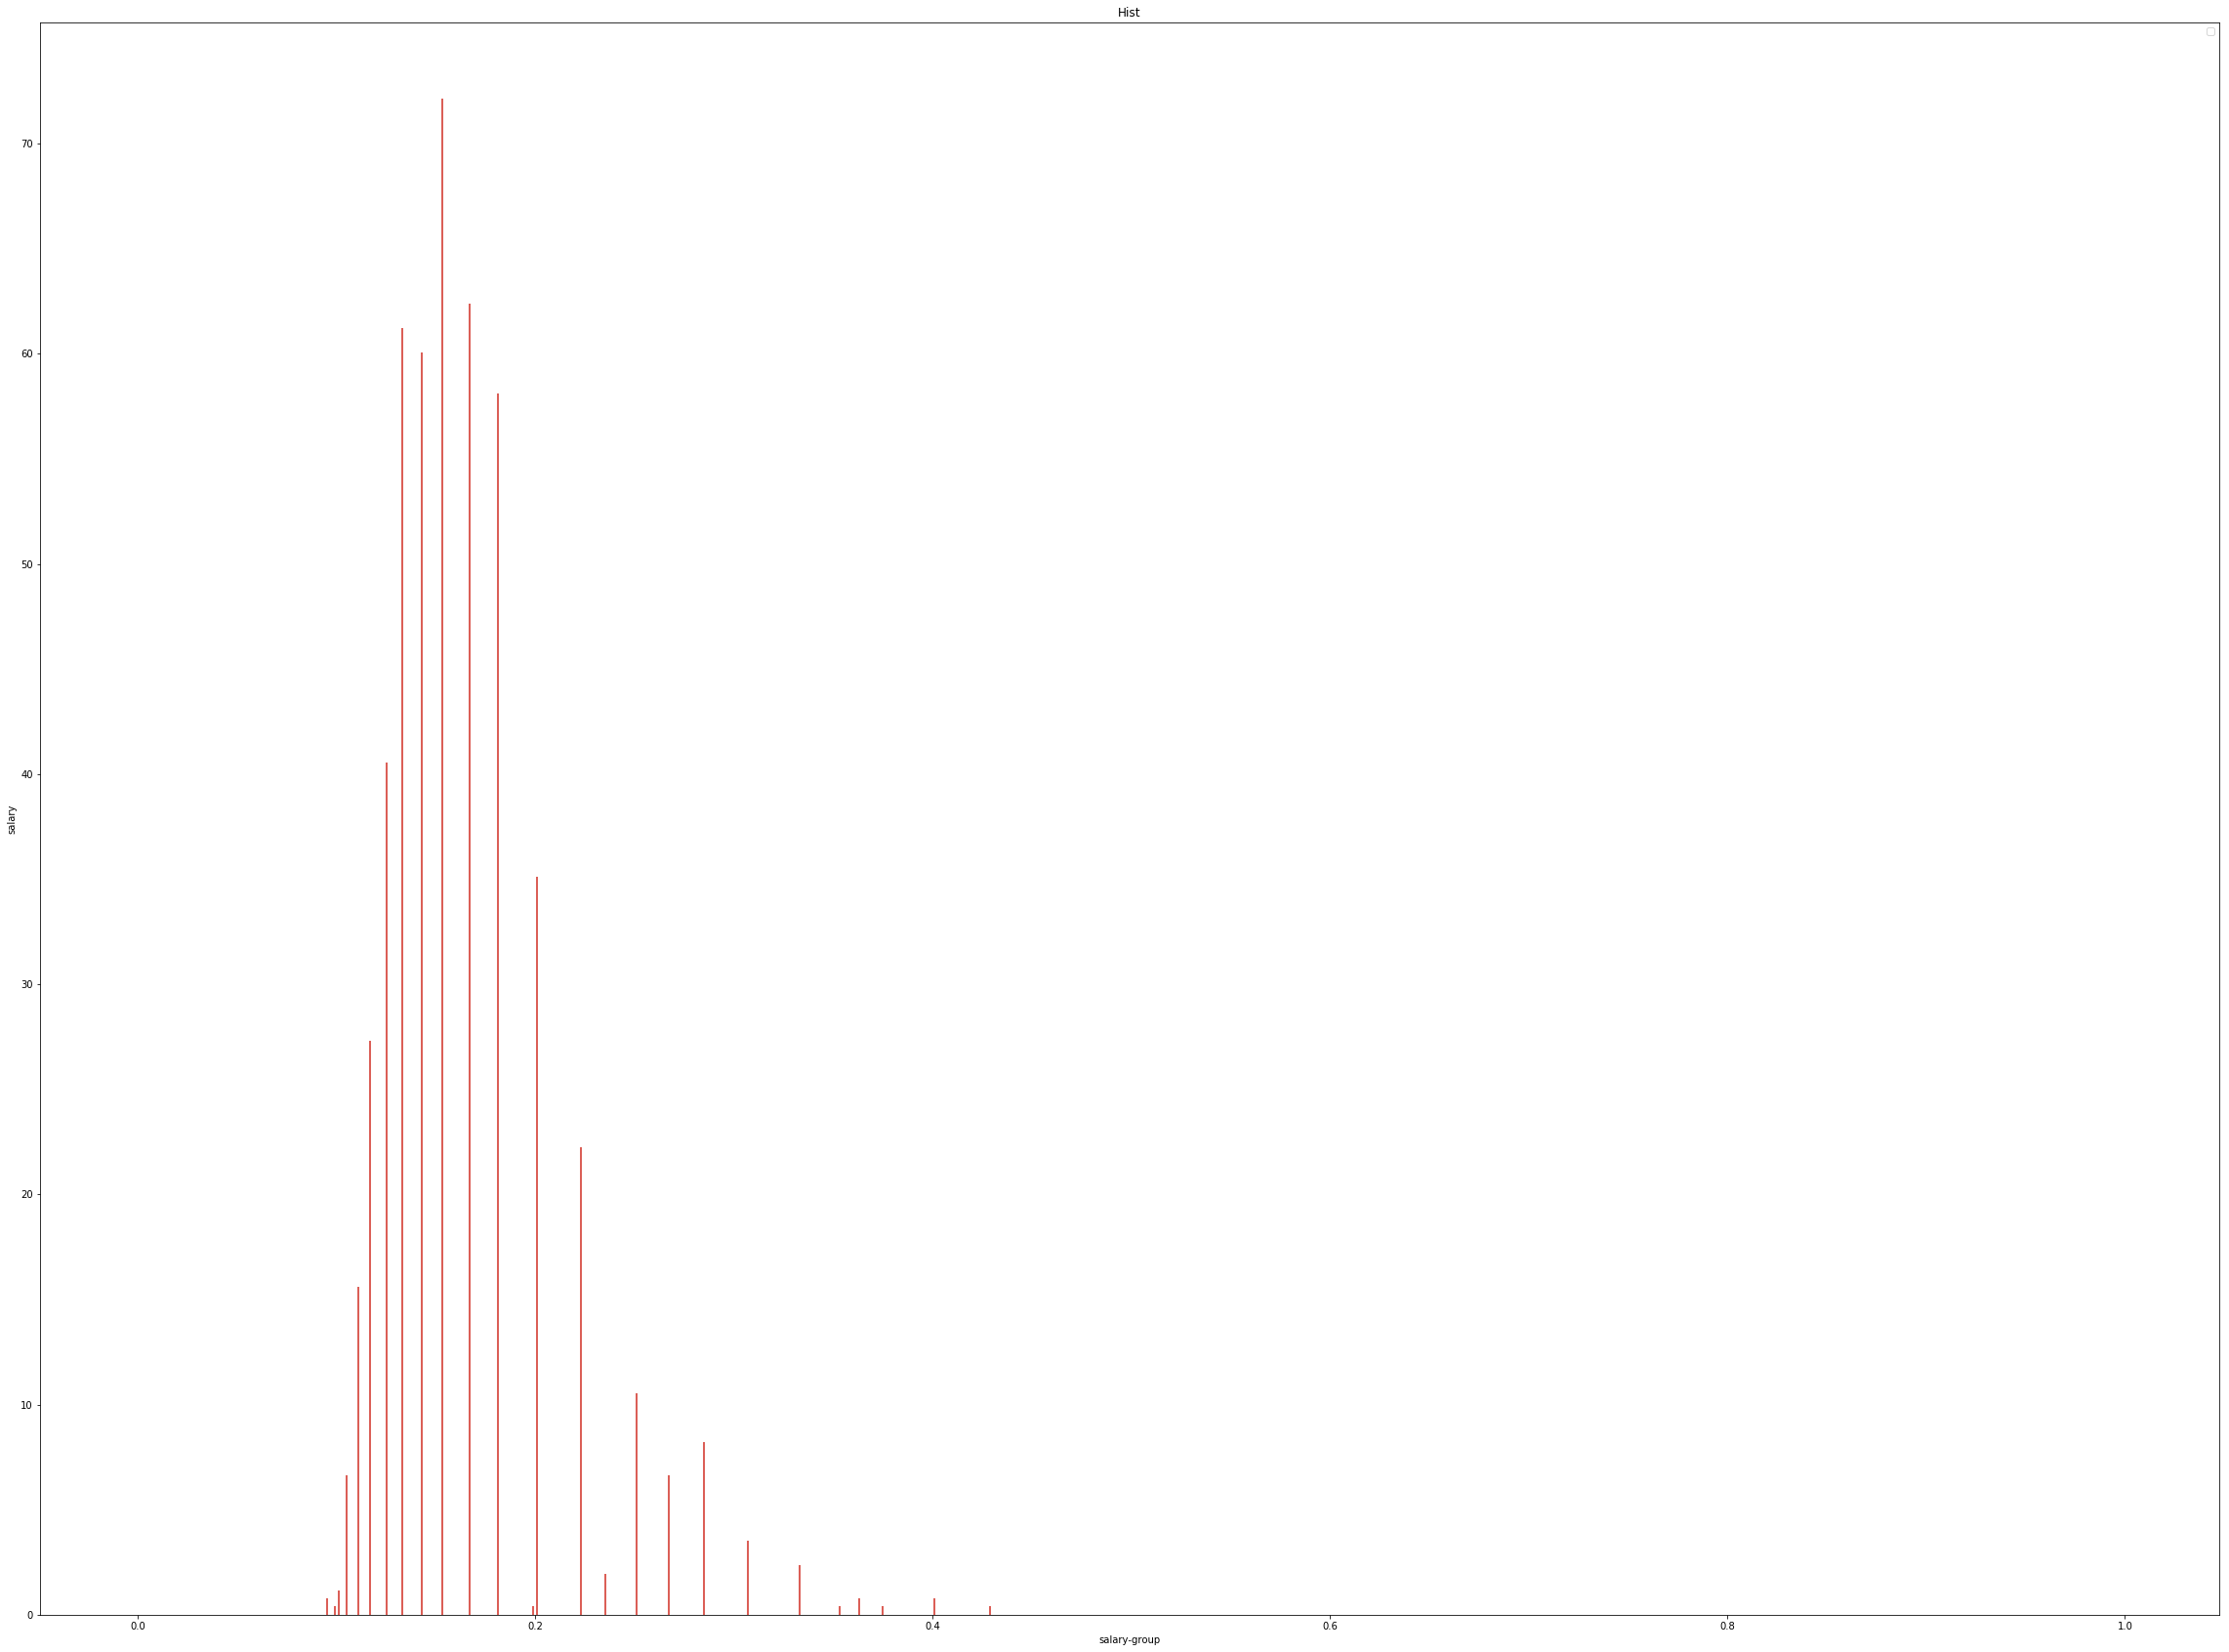

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.59241706,  2.66587678,  0.        ,  4.73933649,  0.        ,
        12.14454976,  0.        , 16.88388626,  0.        , 13.03317536,
        18.95734597,  0.        , 46.50473934,  0.        ,  0.        ,
        50.65165877,  0.        ,  0.        , 62.79620853,  0.        ,
         0.        ,  0.        , 63.09241706,  0.        ,  0.        ,
         0.        , 57.76066351,  0.        ,  0. 

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

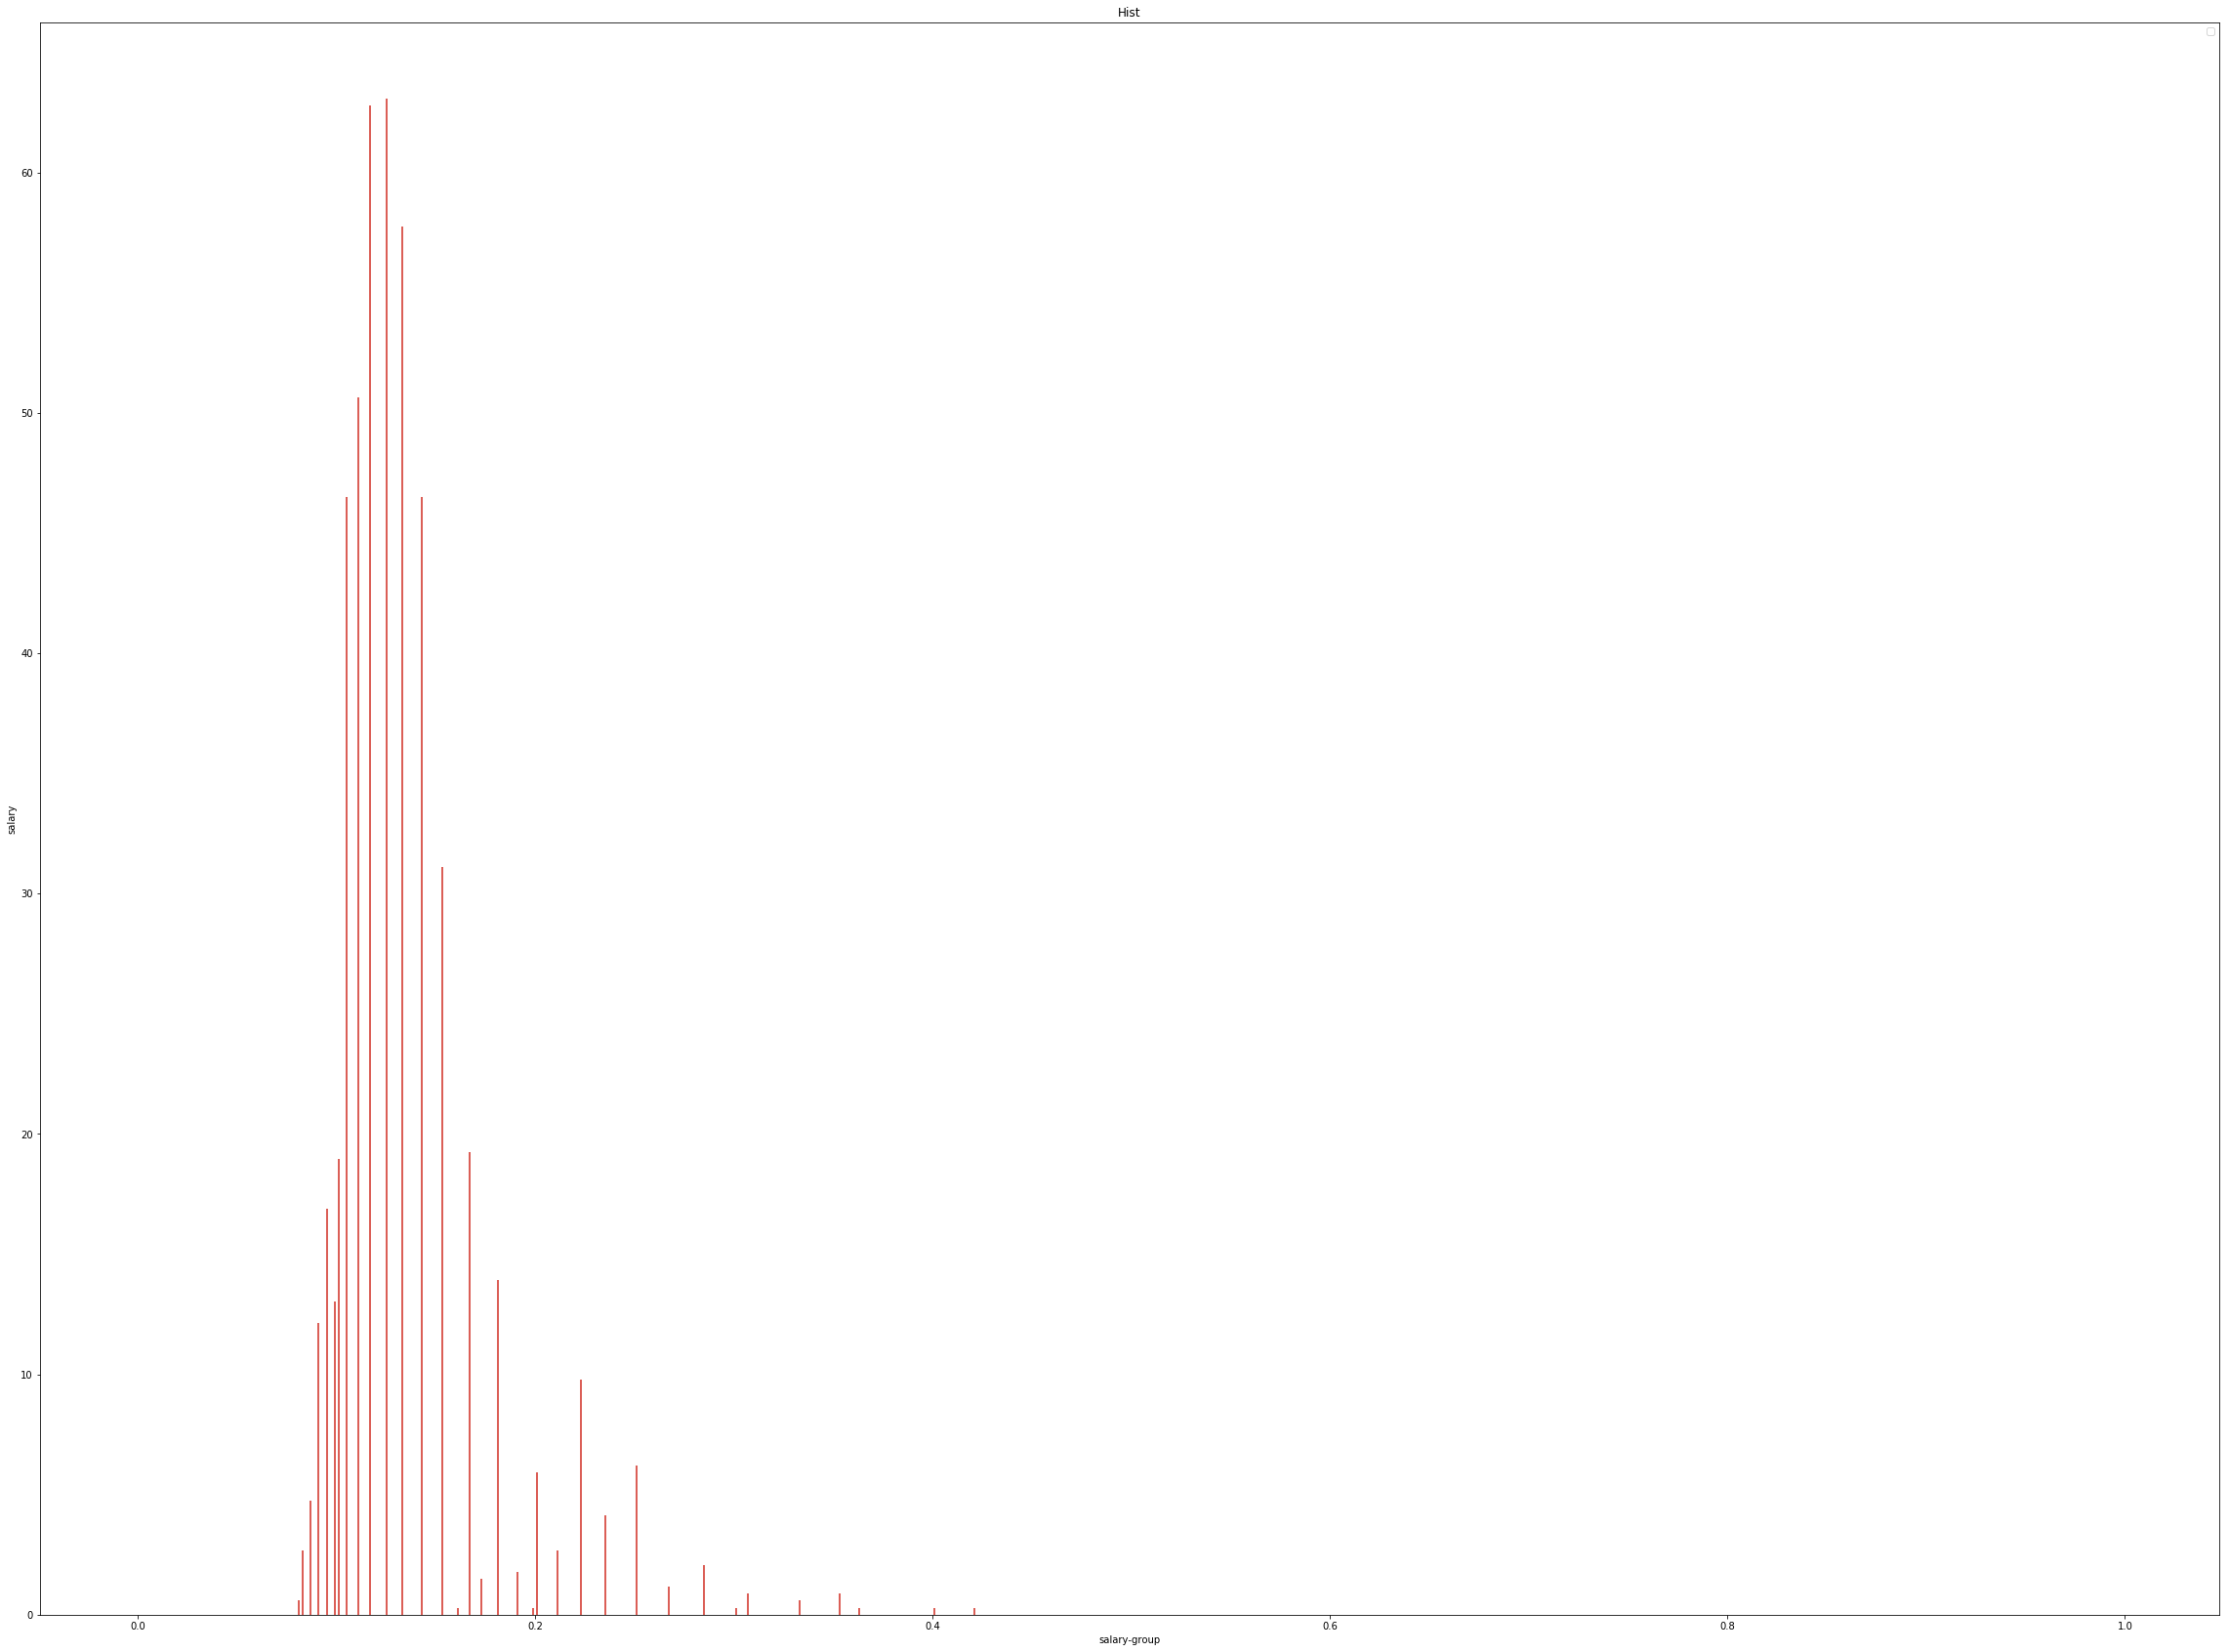

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.7857517 ,
         2.88108958,  0.        ,  2.09533787,  9.69093766,  1.5715034 ,
        15.45311682, 26.45364065,  0.        , 35.88266108,  0.        ,
        45.31168151,  0.        , 51.59769513,  0.        , 14.66736511,
        47.66893662,  0.        , 56.05028811,  0.        ,  0.        ,
        50.28810896,  0.        ,  0.        , 41.12100576,  0.        ,
         0.        ,  0.        , 25.14405448,  0.        ,  0.        ,
         0.        , 18.07228916,  0.        ,  0.5

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

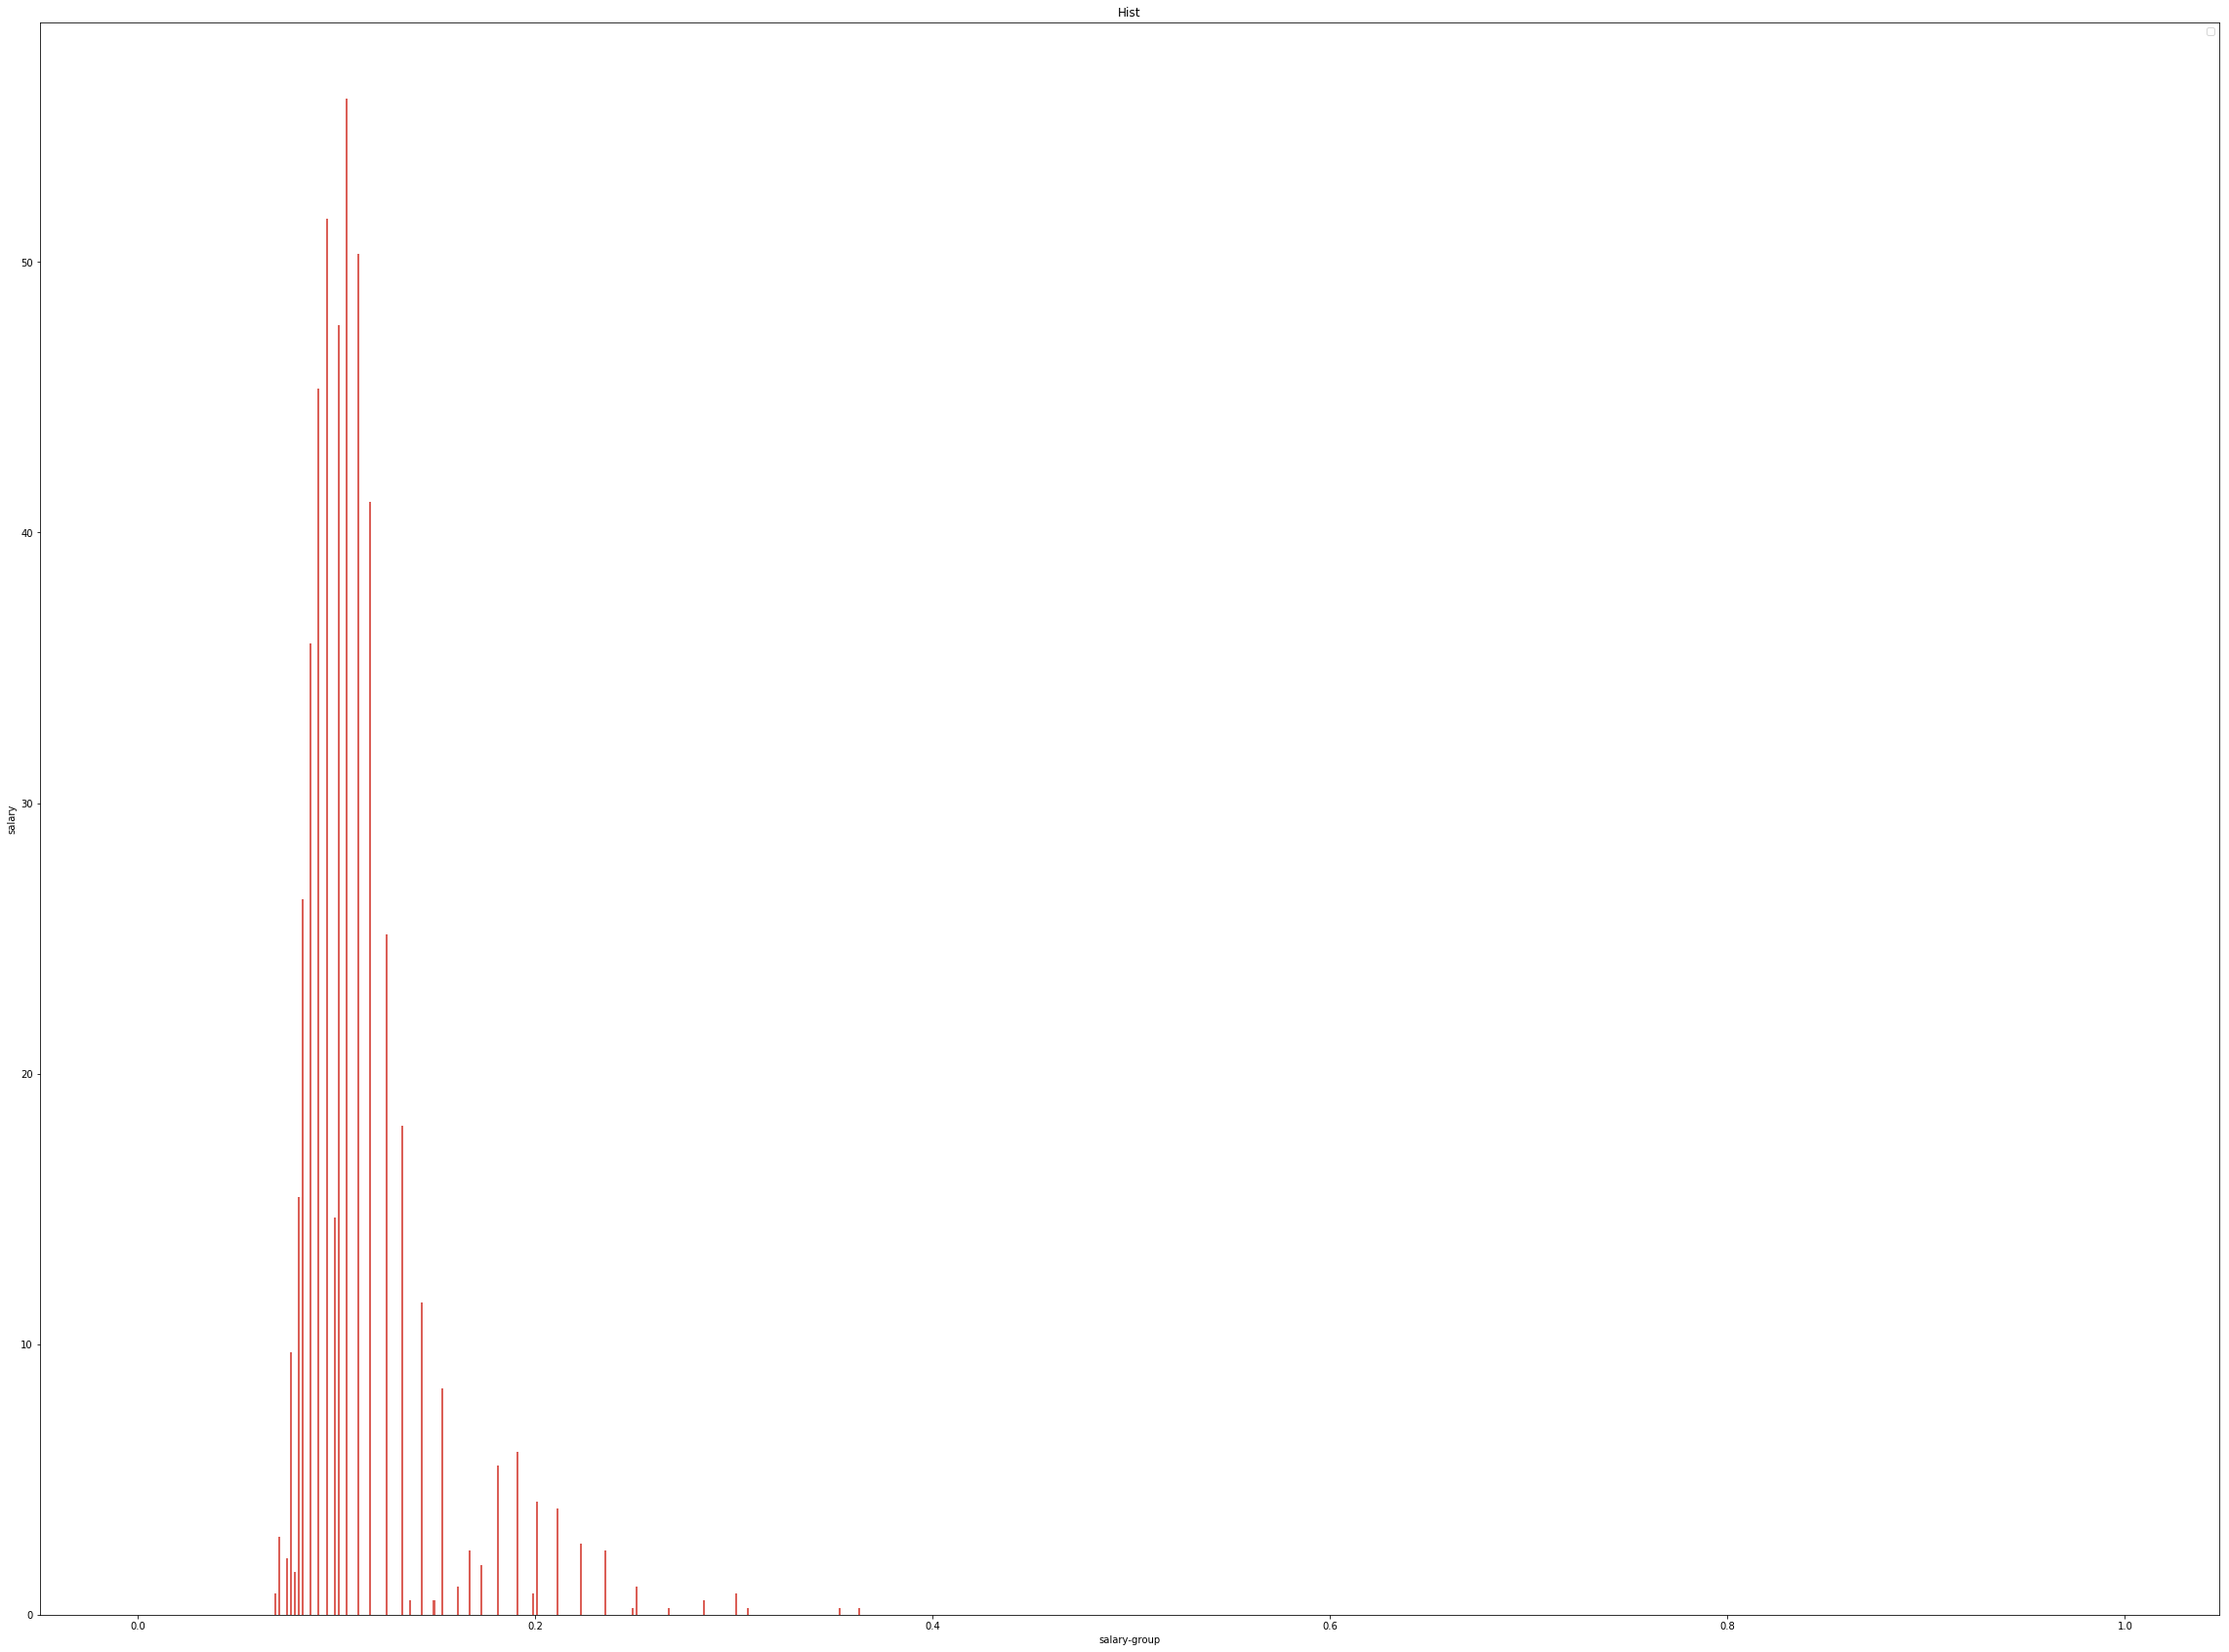

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.73028238,
         0.73028238,  3.16455696,  3.16455696,  9.73709834, 14.60564752,
        23.85589094,  0.        , 29.69814995, 38.94839338, 10.95423564,
        35.05355404, 54.28432327,  0.        , 51.60662123,  0.        ,
        53.06718598,  0.        , 41.62609542,  0.        ,  1.94741967,
        28.96786758,  0.        , 21.42161636,  0.        ,  0.        ,
        18.74391431,  0.        ,  0.        ,  9.49367089,  0.        ,
         0.48685492,  0.        ,  6.81596884,  0.        ,  0.73028238,
         0.        ,  5.84225901,  0.        ,  0.7

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

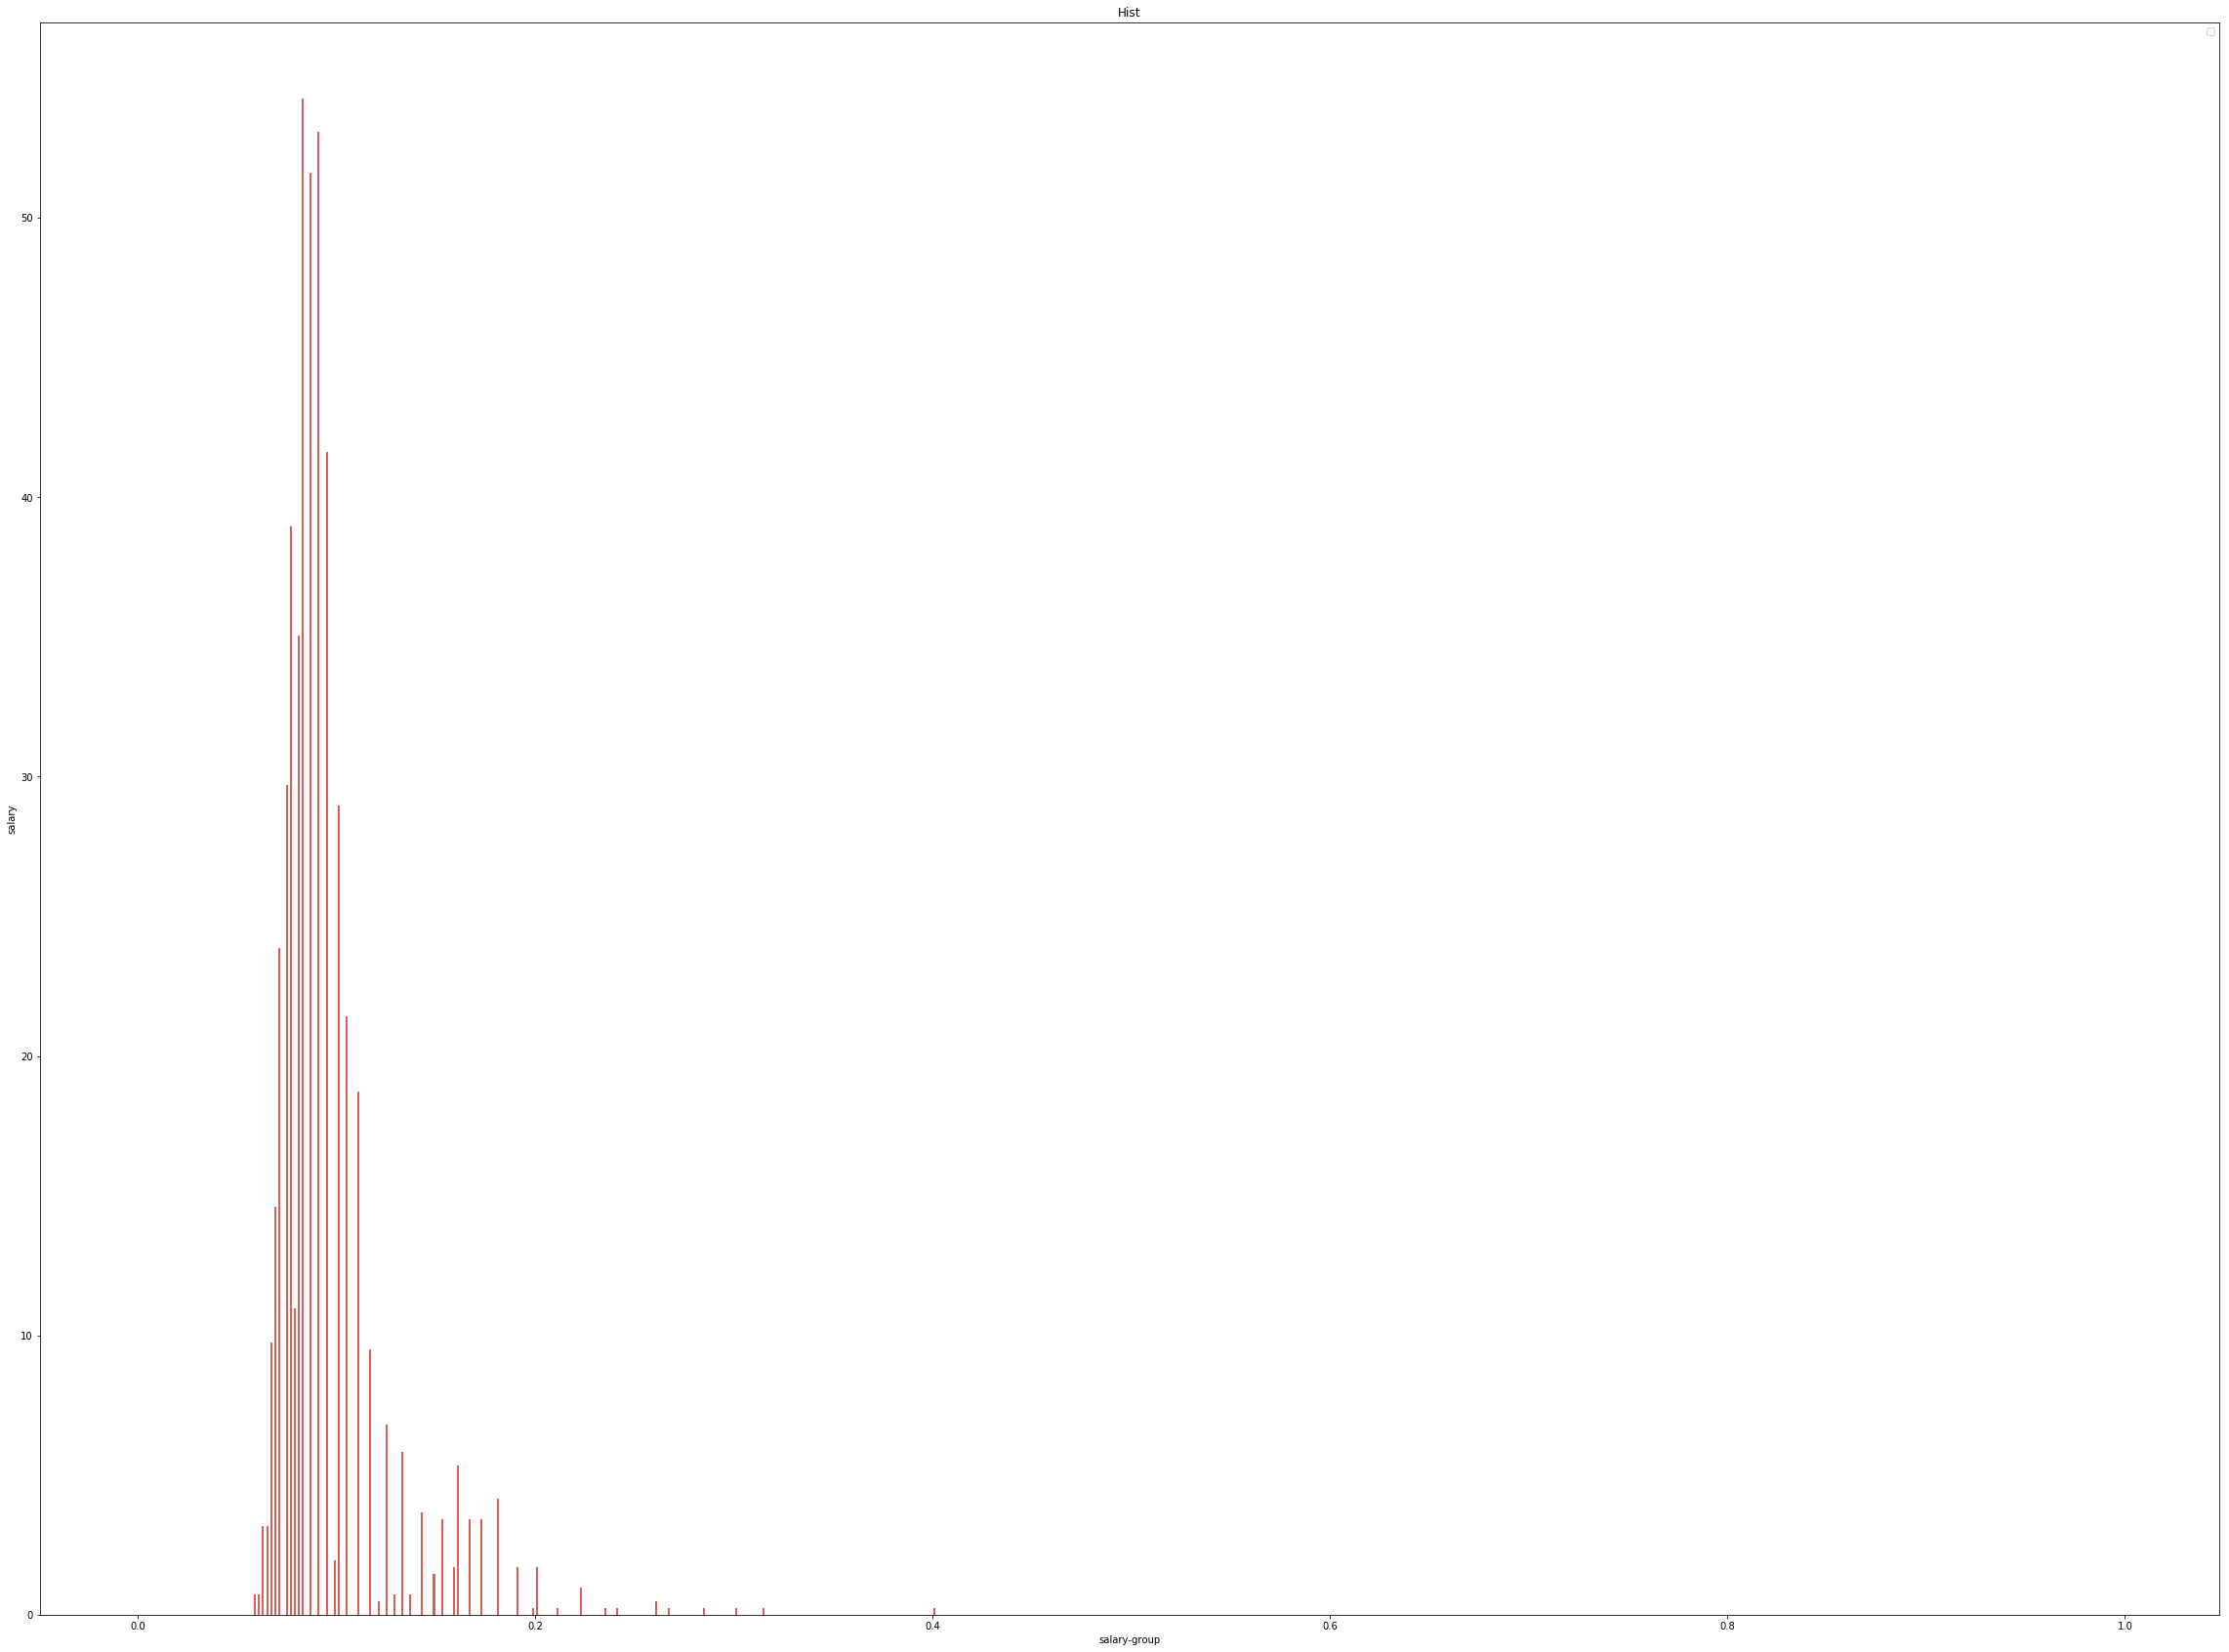

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.23518344,
         0.        ,  0.23518344,  4.70366886,  3.52775165,  7.05550329,
        13.17027281, 17.87394167, 25.16462841, 28.69238006, 41.39228598,
        47.74223895,  0.        , 47.03668862, 48.21260583, 11.28880527,
        37.39416745, 34.80714958,  0.        , 30.5738476 ,  0.        ,
        17.87394167,  0.        , 16.46284102,  0.        ,  0.23518344,
        12.93508937,  0.        ,  6.34995296,  0.        ,  0.47036689,
         6.34995296,  0.        ,  1.17591722,  3.99811853,  0.        ,
         1.6462841 ,  0.        ,  1.6462841 ,  0.        ,  1.88146754,
         0.        ,  3.05738476,  0.        ,  4.7

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

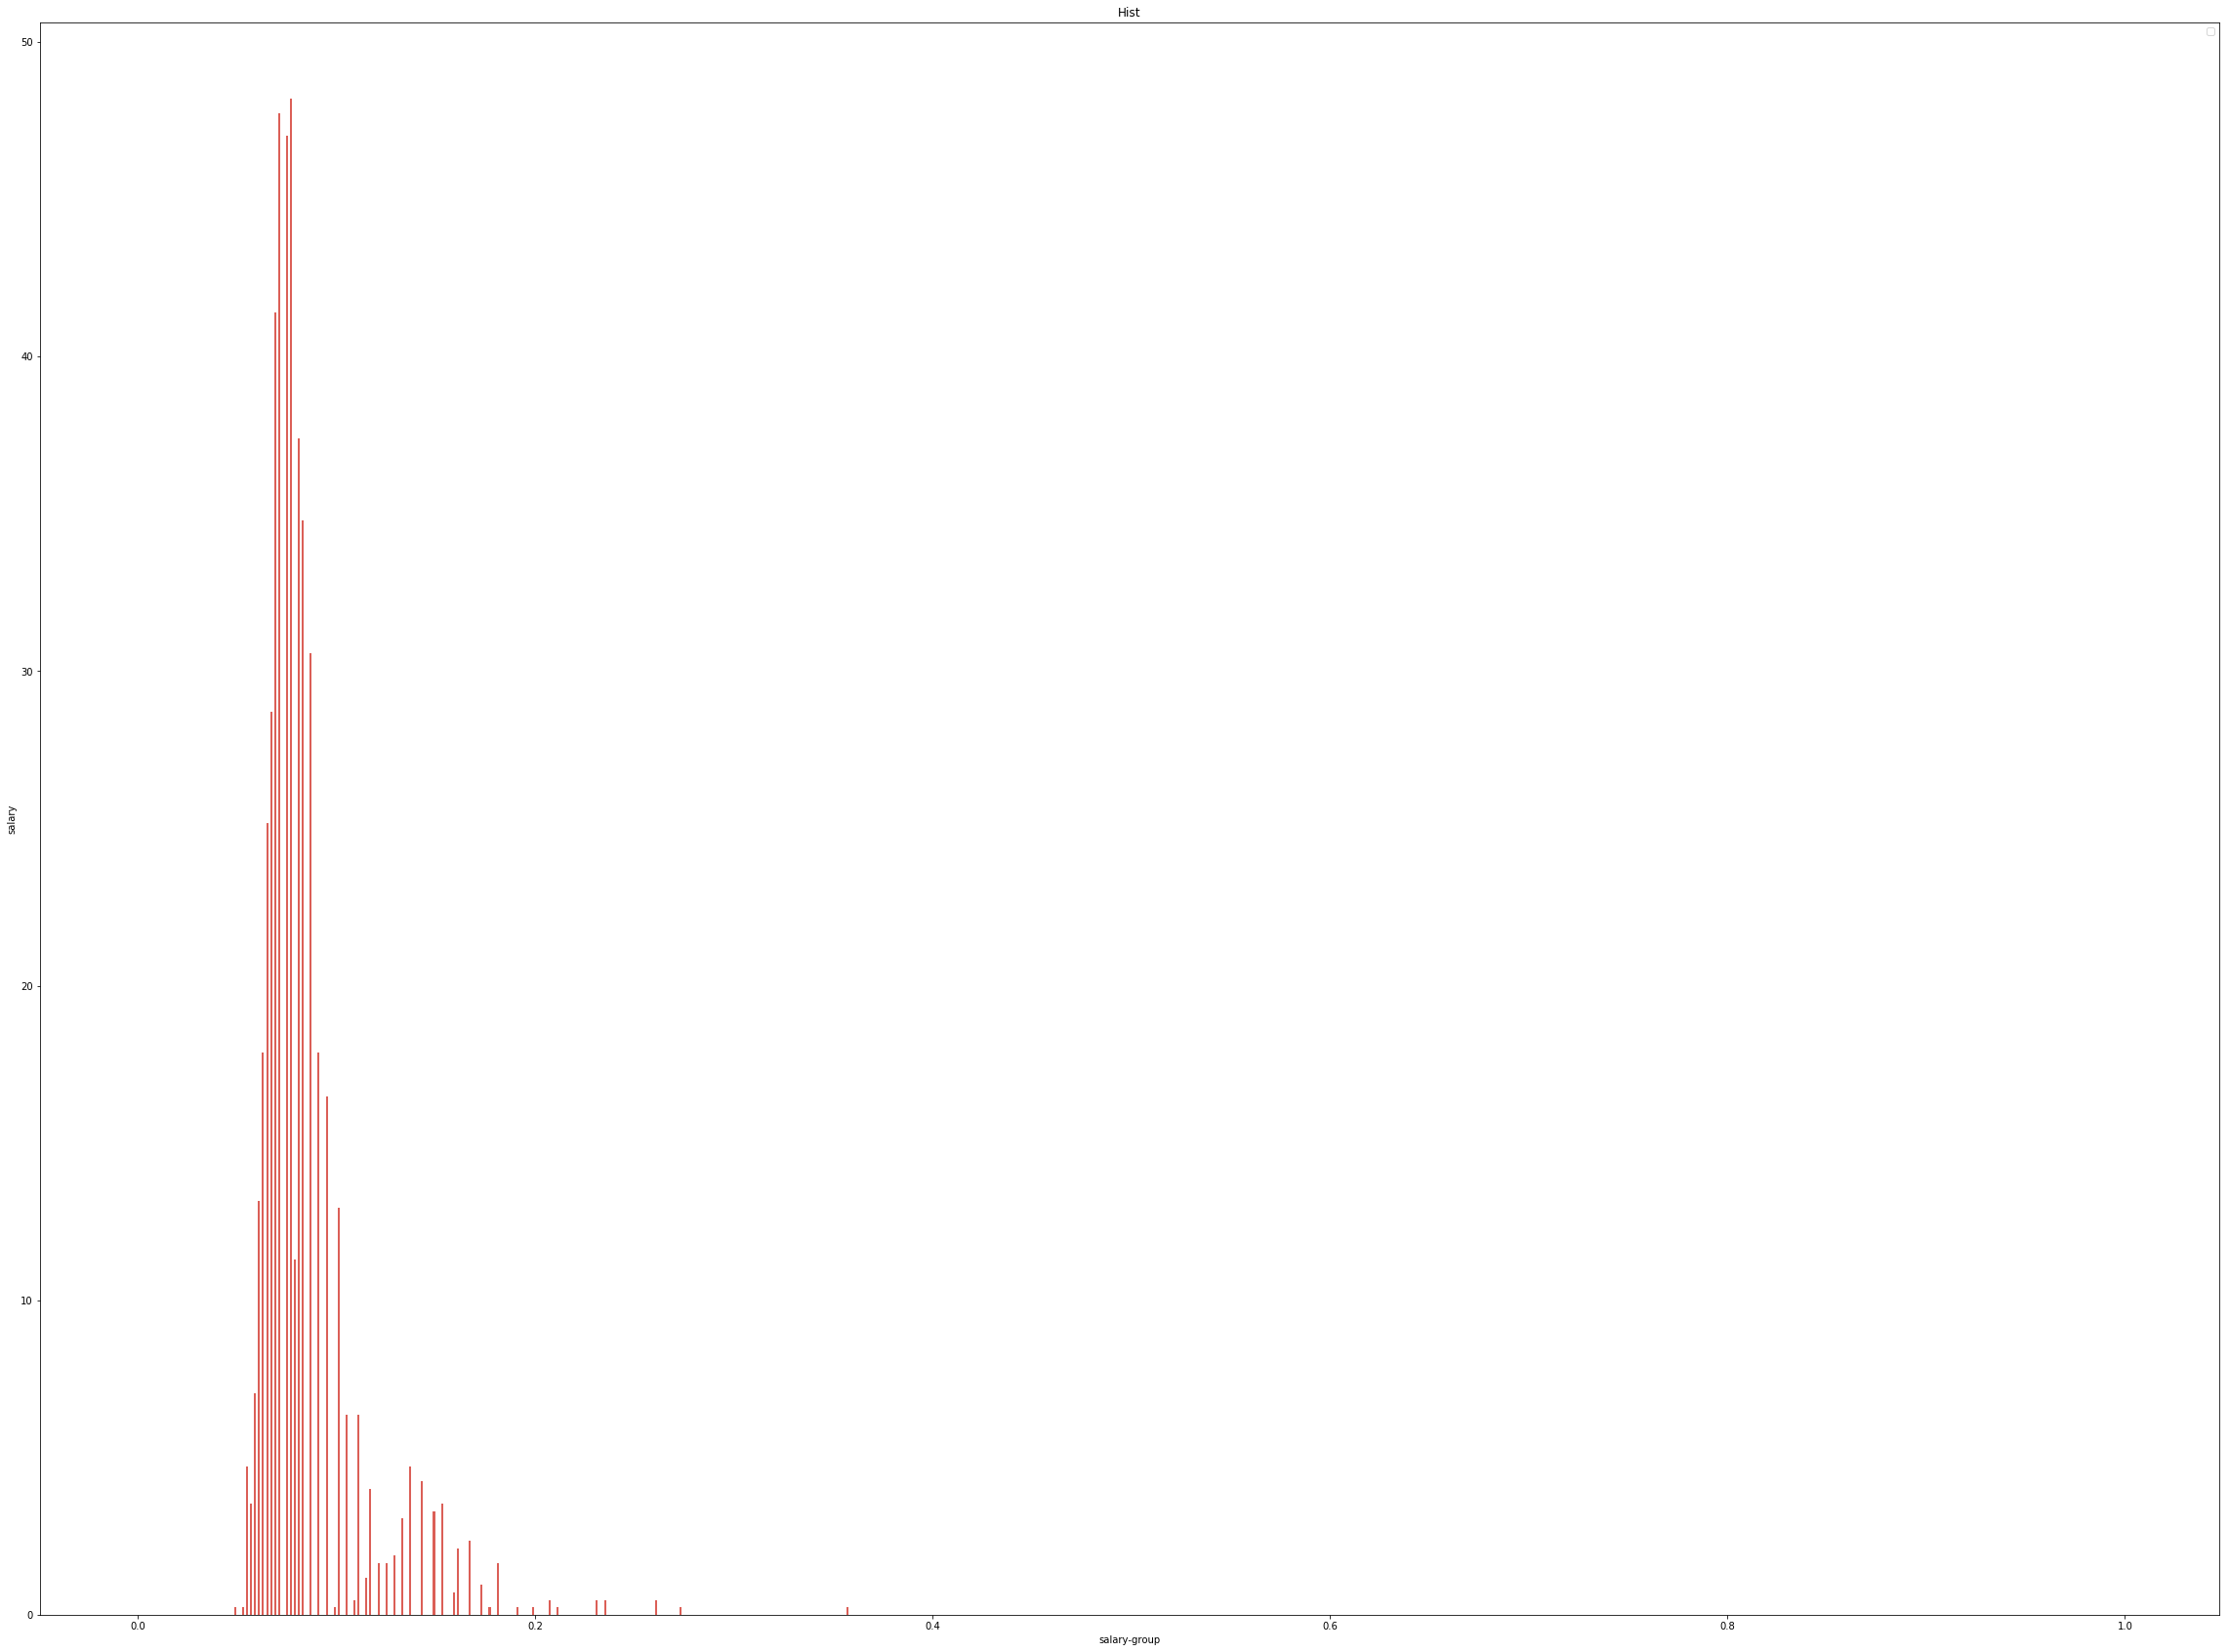

<Figure size 2880x2160 with 0 Axes>

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.22977941,  0.        ,  0.45955882,  3.90625   ,
         5.97426471,  8.27205882, 26.88419118, 20.90992647, 28.03308824,
        33.31801471, 42.04963235, 42.73897059, 40.90073529, 45.95588235,
        38.83272059,  0.        , 31.02022059, 26.88419118,  2.06801471,
        16.31433824, 14.70588235,  0.        , 12.86764706,  0.        ,
         8.27205882,  0.        ,  5.05514706,  0.22977941,  0.22977941,
         5.51470588,  0.68933824,  3.21691176,  0.        ,  0.91911765,
         1.83823529,  0.        ,  1.83823529,  2.98713235,  0.        ,
         2.06801471,  0.        ,  4.82536765,  0.        ,  3.21691176,
         0.        ,  2.98713235,  0.        ,  2.5

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

<Figure size 432x288 with 0 Axes>

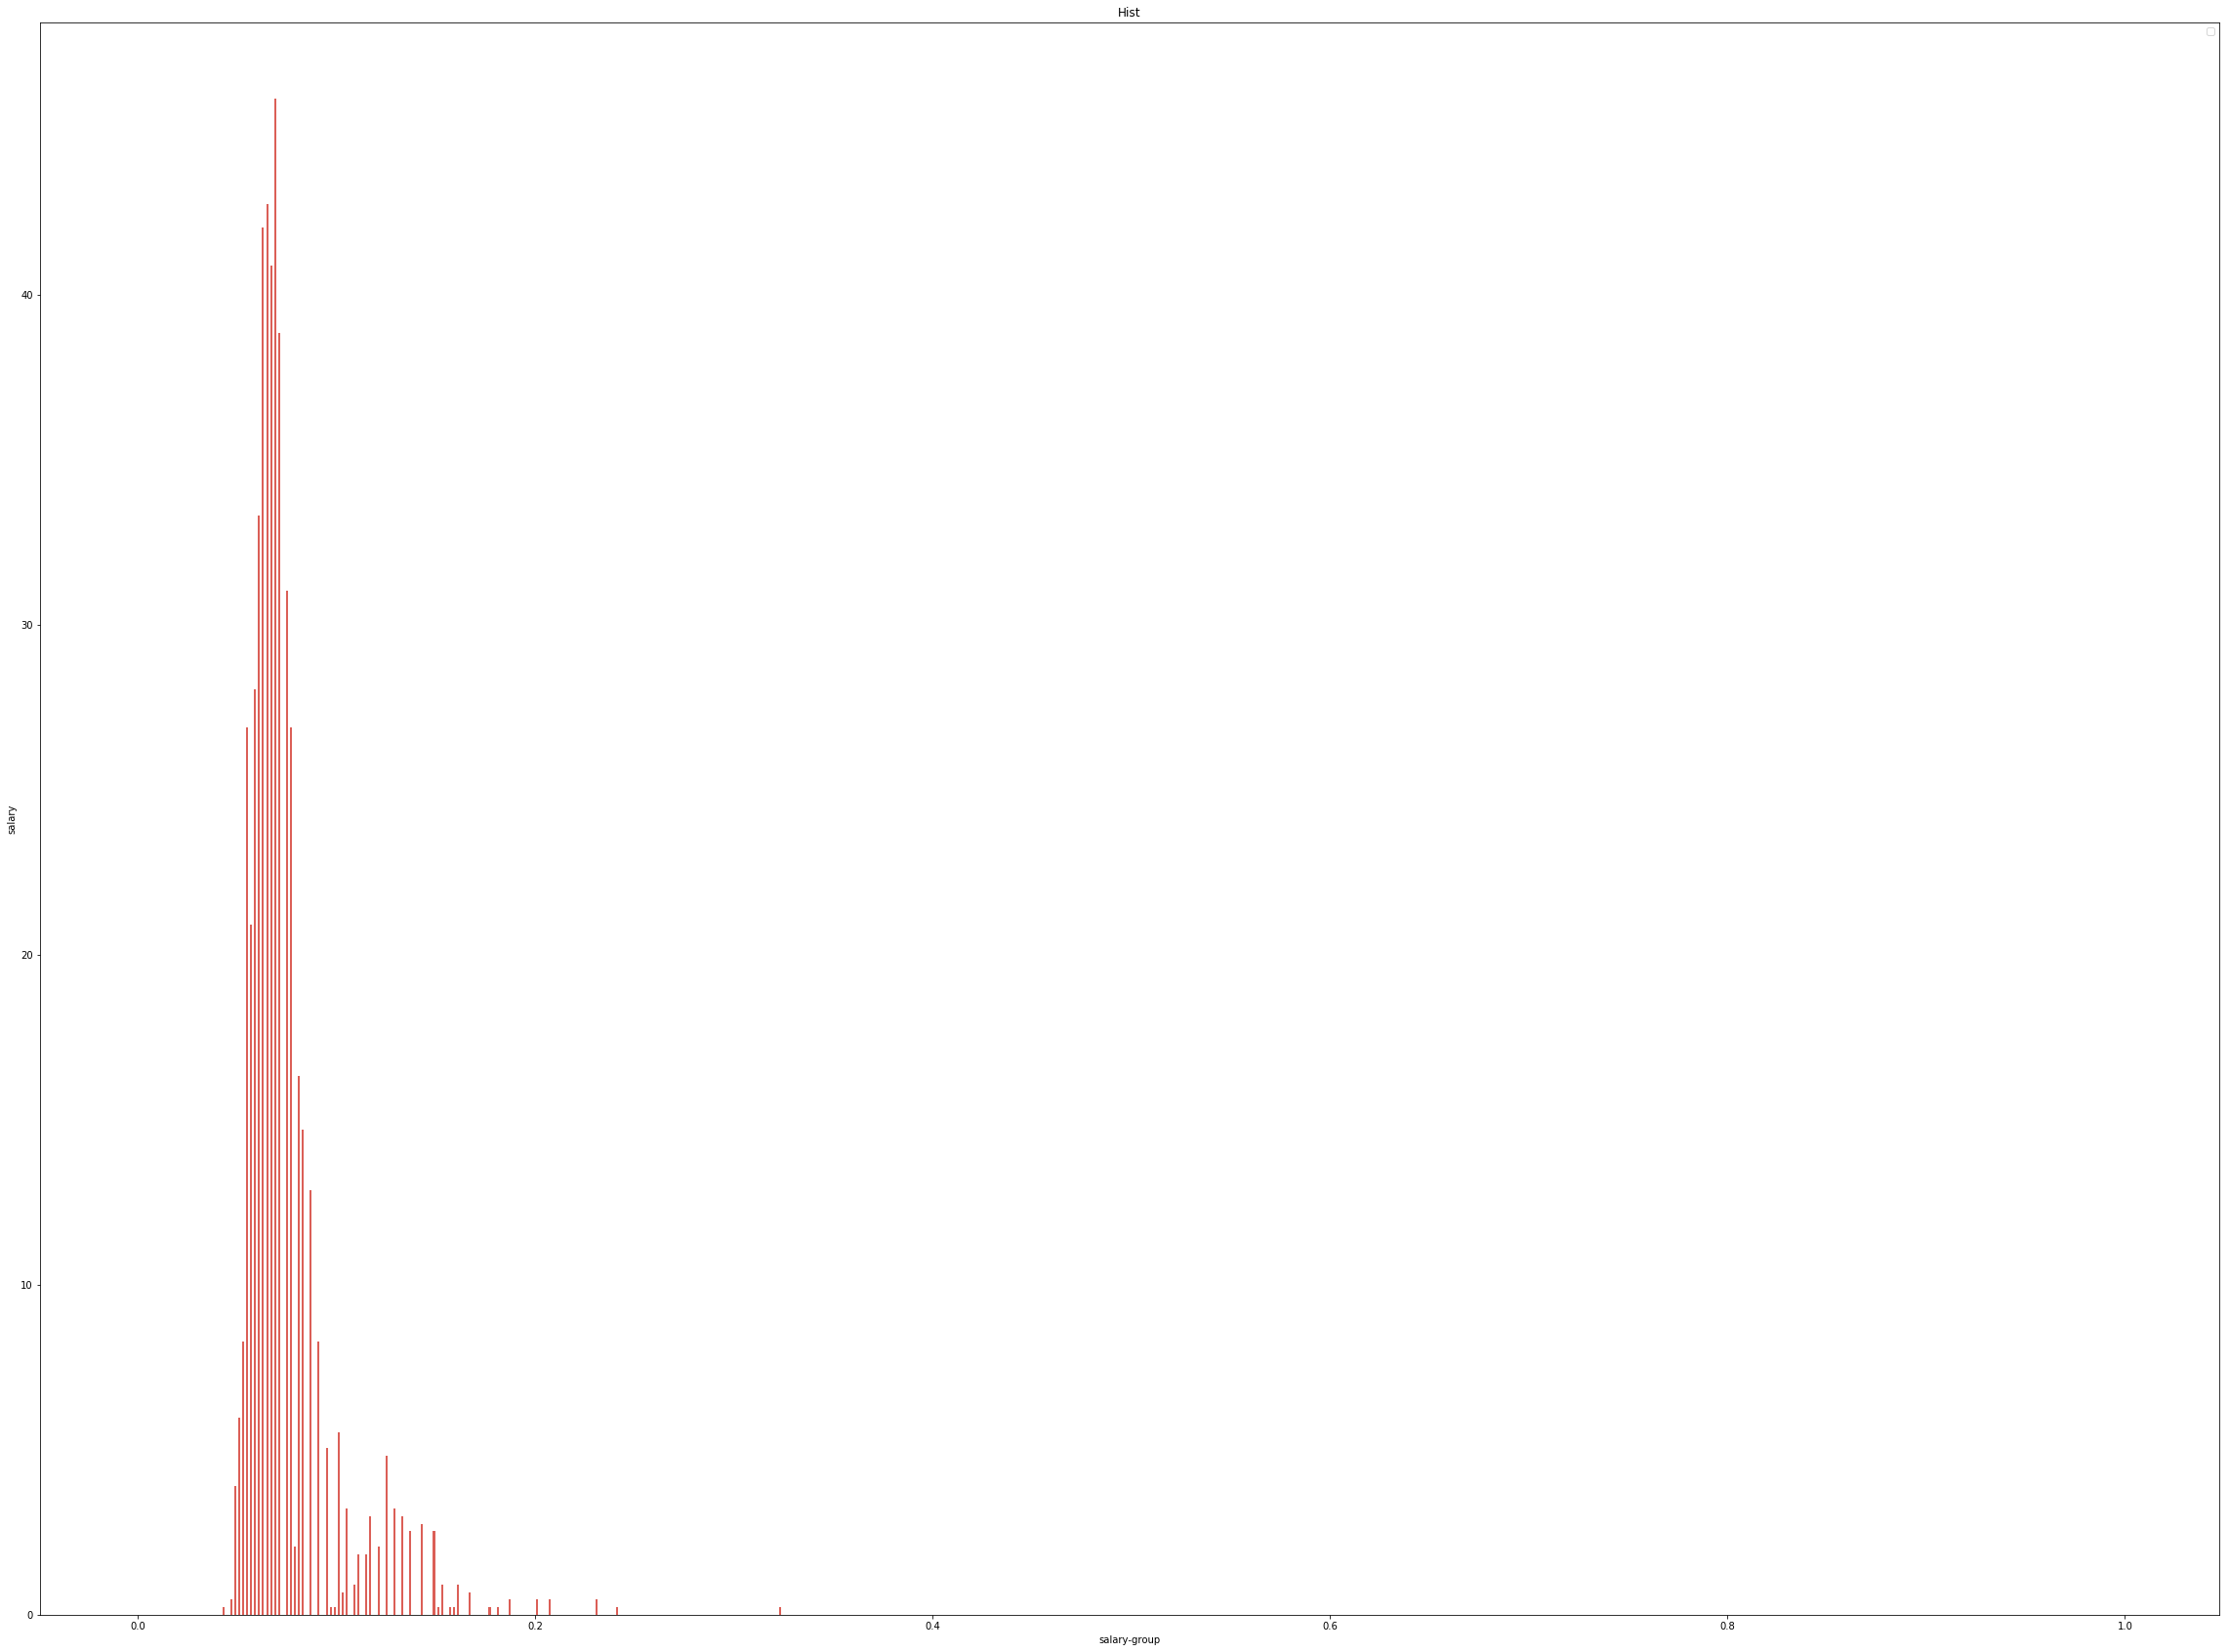

<Figure size 432x288 with 0 Axes>

In [134]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.core.frame import DataFrame
# a=[1,2,3,4]#列表a
# b=[5,6,7,8]#列表b
# c={"a" : a,
#    "b" : b}#将列表a，b转换成字典
# data=DataFrame(c)#将字典转换成为数据框
# print(data)
for index in range(1, 8):
    x = list()
    for i in log_res[index]:
        if i.split()[0] != '0':
            x.append(float(i.split()[0]))
#     data = [[0] for i in range(50)]
#     for r in x:
#         k = int(r / 0.02)
#         data[k][0] += 1
#     x = [f[0] for f in data]
    plt.figure(figsize=(40.0, 30.0))
    group = list(range(0, 500))
    group = [i / 500 for i in group]
    plt.hist(x, group, histtype='bar', rwidth=0.5, density=True)
    plt.legend()
    plt.xlabel('salary-group')
    plt.ylabel('salary')
    plt.title(u'Hist')
    plt.show()
    plt.savefig("log_res_rouge1_hist_{}.PNG".format(index))
    # x = np.array(x)
    # x = pd.Series(x, name="log_res_rouge1_{}.PNG".format(index))
    # plt.figure(figsize=(160.0, 120.0))
    # sns.set_palette("hls")
    # data = x
    # sns.distplot(data)
    # sns.distplot(data, kde=True, rug=False, hist=True)
    # # 更细致的, 来用各kwargs来指定 (参数的参数dict)
    # sns.distplot(data, kde_kws={"color": "seagreen", "lw":3, "label" : "KDE" }, 
    #              hist_kws={"histtype": "stepfilled", "color": "slategray" })

    # d = {'rouge': x}
    # data = DataFrame(d)
    # x = data
    # plt.figure(figsize=(160.0, 120.0))
    # # sns.distplot(x, hist=False, color='red', kde=False, fit=stats.gamma)
    # sns.kdeplot(x, shade=True, color="r")
    # plt.savefig("log_res_rouge1_{}.PNG".format(index))


In [74]:
# plt.figure(figsize=(160.0, 120.0))
# sns.set_palette("hls")
# # plt.rc("figure", figsize=(9, 5))
# data = randn(200)
# sns.distplot(data)
# sns.distplot(data, kde=True, rug=False, hist=True)
# # 更细致的, 来用各kwargs来指定 (参数的参数dict)
# sns.distplot(data, kde_kws={"color": "seagreen", "lw":3, "label" : "KDE" }, 
#              hist_kws={"histtype": "stepfilled", "color": "slategray" })


# import seaborn as sns
# import numpy as np
# from numpy.random import randn
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# from scipy import stats


# sns.set_palette("hls")
# mpl.rc("figure", figsize=(9, 5))
# data = randn(200)
# data = x
# sns.distplot(data)
# sns.distplot(data, kde=True, rug=False, hist=True)
# # 更细致的, 来用各kwargs来指定 (参数的参数dict)
# sns.distplot(data, kde_kws={"color": "seagreen", "lw": 3, "label": "KDE"},
#              hist_kws={"histtype": "stepfilled", "color": "slategray"})

# x
# data = [[0] for i in range(50)]
# for r in x:
#     k = int(r / 0.02)
#     data[k][0] += 1
# print(data)
#     x = [f for f in data]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.91911765,
        18.01470588, 40.99264706, 19.76102941,  8.77757353,  2.75735294,
         2.06801471,  1.33272059,  2.02205882,  1.10294118,  1.05698529,
         0.32169118,  0.32169118,  0.04595588,  0.13786765,  0.        ,
         0.18382353,  0.        ,  0.        ,  0.09191176,  0.04595588,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04595588,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

No handles with labels found to put in legend.


Text(0.5, 0, 'salary-group')

Text(0, 0.5, 'salary')

Text(0.5, 1.0, 'Hist')

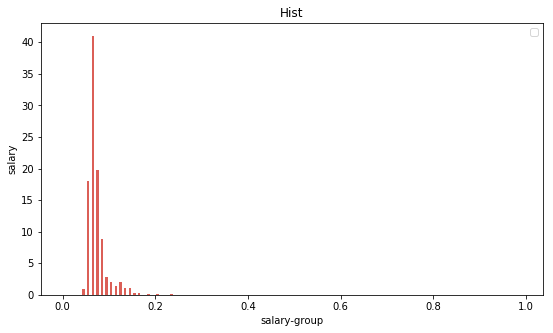

In [110]:
l = list(range(0, 10))
l
salary = list()
for i in range(0, 10):
    for j in range(0, 10):
        salary.append(i * j)
# x
group = list(range(0, 100))
group = [i / 100 for i in group]
# plt.hist(salary, group, histtype='bar', rwidth=0.5)
plt.hist(x, group, histtype='bar', rwidth=0.5, density=True)

plt.legend()
plt.xlabel('salary-group')
plt.ylabel('salary')

plt.title(u'Hist')

plt.show()

In [81]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

In [162]:
rankres = list()
with open('./rankres.txt', 'r') as f:
    rankres = f.readlines()

# print(analyze_raw(rankres), end='\t')
print(analyze_nan_stripped(rankres))

for score in analyze_nan_stripped(rankres):
    print("%.3f" % (score), end=' | ')
print('\n')

(0.3699853648088237, 0.26494937270876223, 0.3469432863363428)
0.370 | 0.265 | 0.347 | 

